# PROJECT TITLE: Breast cancer Detection using various ML Algorithm - Evaluation

## About the Project
In this project, I worked with a dataset containing 569 entries. The dataset includes 32 key features such as radius_mean, texture_mean, area_mean, and more, which describe different characteristics of cell nuclei present in digitalized images of breast mass. The goal of this project is to evaluate the performance of various machine learning algorithms for accurately detecting breast cancer as either malignant or benign.
## Goal:
To determine the most effective machine learning model for detecting breast cancer by evaluating their accuracy, robustness, and reliability.
## Dataset Details:
### The dataset contains the following columns:
* ID: A unique identifier for each patient.
* Diagnosis: The target variable indicating whether the tumor is benign (B) or malignant (M).
* radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, etc.: These columns represent the mean, standard error, and worst (largest) values of several cell nucleus features.
## Methodologies:
* Data Preparation:Dataset wasd organized to ensure it is structured correctly for analysis and modeling.
* Data Cleaning and Preprocessing: 
 ** Missing or inconsistent values were handled using the pandas library.
 ** Numeric features were normalized to enhance model performance.
 ** The categorical diagnosis column were encoded as binary values (M=1, B=0) for machine learning purposes.
## Exploratory Data Analysis (EDA):
* Relationships were between features were vitualized using scatter plots, histograms, and box plots to identify trends and correlations in the data.
* Analysis of the distribution of benign and malignant cases was done.
## Modeling:
* I applied multiple machine learning algorithms, including Logistic Regression, Decision Trees, Random Forests, and Support Vector Machines (SVM).
* I trained the models to predict whether a tumor is benign or malignant.
## Evaluation:
The project involved rigorous testing of various models, and their performance was compared using the following metrics:
* Confusion Matrix: To evaluate true positives, true negatives, false positives, and false negatives.
* MAE and MSE: To quantify prediction errors for continuous features.
* R² Score: To measure the proportion of variance explained by the model.
## Skills Developed:
* I Understand feature engineering and data preprocessing for medical datasets.
* I learnt practical experience in applying and evaluating various machine learning algorithms.
* Proficiency in Python libraries like pandas, matplotlib, seaborn, and scikit-learn.
* Ability to compare model performance using evaluation metrics and select the best-performing model.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

In [62]:
df = pd.read_csv(r"C:\Users\UDOH\Documents\10_BreastCancerDetection_VariousMLAlgorithm\10_BreastCancerDetection_VariousMLAlgorithm\data.csv")

In [63]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Mapping Class String Values to Numbers.
The reason is because we have the diagnosis column with text 

In [25]:
df["diagnosis"] = df["diagnosis"].map({'B':0, 'M':1 }).astype(int)
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


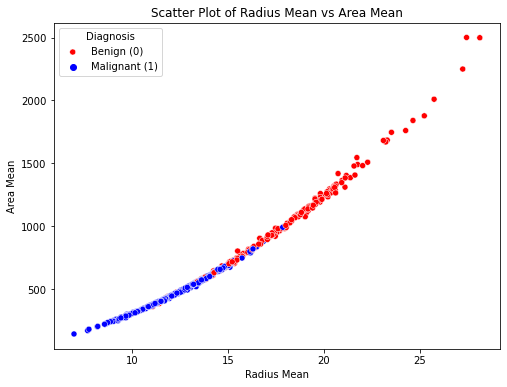

In [26]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="radius_mean", y="area_mean", hue="diagnosis", palette={0: "blue", 1: "red"})
plt.title("Scatter Plot of Radius Mean vs Area Mean")
plt.xlabel("Radius Mean")
plt.ylabel("Area Mean")
plt.legend(title="Diagnosis", labels=["Benign (0)", "Malignant (1)"])
plt.show()

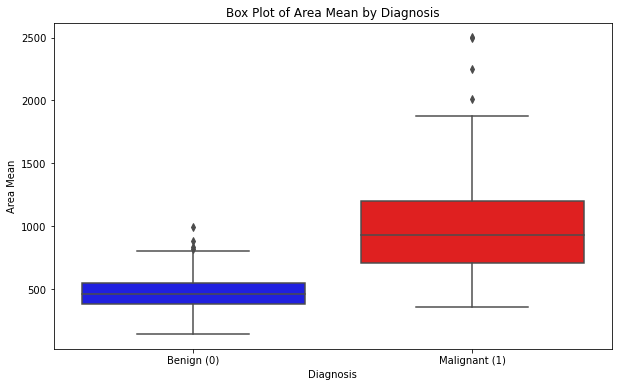

In [28]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="diagnosis", y="area_mean", palette={0: "blue", 1: "red"})
plt.title("Box Plot of Area Mean by Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Area Mean")
plt.xticks(ticks=[0, 1], labels=["Benign (0)", "Malignant (1)"])
plt.show()

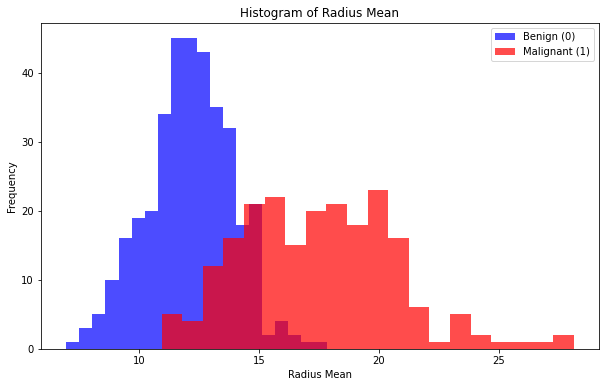

In [32]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df[df["diagnosis"] == 0]["radius_mean"], bins=20, alpha=0.7, label="Benign (0)", color="blue")
plt.hist(df[df["diagnosis"] == 1]["radius_mean"], bins=20, alpha=0.7, label="Malignant (1)", color="red")
plt.title("Histogram of Radius Mean")
plt.xlabel("Radius Mean")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [40]:
# Correlation of all features against diagnosis
df = df.drop(columns=['id'])
correlation_with_diagnosis = df.corr()["diagnosis"].drop("diagnosis")
print("\nCorrelation of each feature with Diagnosis:")
print(correlation_with_diagnosis)


Correlation of each feature with Diagnosis:
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst    

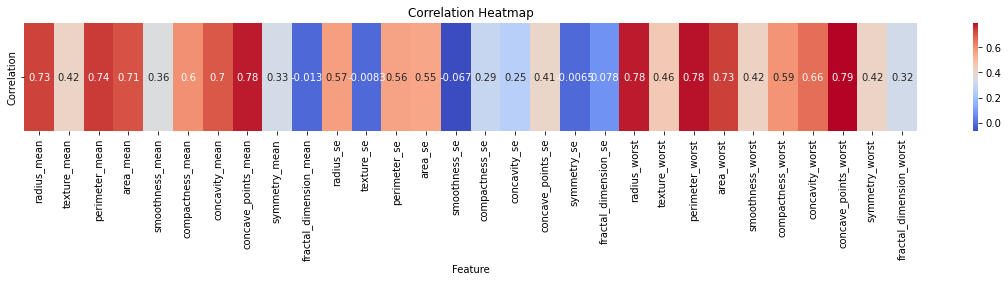

In [51]:
data = {
    'radius_mean': 0.730029,
    'texture_mean': 0.415185,
    'perimeter_mean': 0.742636,
    'area_mean': 0.708984,
    'smoothness_mean': 0.358560,
    'compactness_mean': 0.596534,
    'concavity_mean': 0.696360,
    'concave_points_mean': 0.776614,
    'symmetry_mean': 0.330499,
    'fractal_dimension_mean': -0.012838,
    'radius_se': 0.567134,
    'texture_se': -0.008303,
    'perimeter_se': 0.556141,
    'area_se': 0.548236,
    'smoothness_se': -0.067016,
    'compactness_se': 0.292999,
    'concavity_se': 0.253730,
    'concave_points_se': 0.408042,
    'symmetry_se': -0.006522,
    'fractal_dimension_se': 0.077972,
    'radius_worst': 0.776454,
    'texture_worst': 0.456903,
    'perimeter_worst': 0.782914,
    'area_worst': 0.733825,
    'smoothness_worst': 0.421465,
    'compactness_worst': 0.590998,
    'concavity_worst': 0.659610,
    'concave_points_worst': 0.793566,
    'symmetry_worst': 0.416294,
    'fractal_dimension_worst': 0.323872
}

# Convert the data to a pandas DataFrame
df = pd.DataFrame(list(data.items()), columns=['Feature', 'Correlation'])

# Reshape the dataframe to a matrix for the heatmap
corr_matrix = df.set_index('Feature').T

# Plotting the heatmap
plt.figure(figsize=(20, 2))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

### Segregate Dataset into X(input/IndependentVariable) & Y(Output/DependentVariable)

In [7]:
x = df.iloc[:, 2:32].values
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [8]:
Y = df.iloc[:,1].values
Y

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

### Splitting Dataset into Train & Test

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.25, random_state=42)

### Feature Scaling
We scale our data to make all the features contribute equally to the result
Fit-Transform-fit method is calculating the mean and variance of each of the features present in our data
Trasform-Transform method is transforming all the features using the respective mean and variance, we want our test data
to be a completely new and a surprise set for our model

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Validating Some ML algorithms by its accuracy -Model Score

In [66]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import f1_score

In [67]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('Random Forest', RandomForestClassifier()))

LR: 0.969324
LDA: 0.948394
KNN: 0.964618
CART: 0.934219
NB: 0.929568
SVM: 0.966999
Random Forest: 0.953045


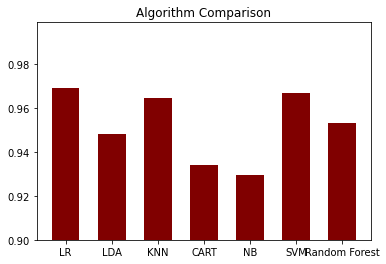

In [68]:
results = []
names = []
res = []
for name, model in models:
    kfold =StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, x_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res.append(cv_results.mean())
    print('%s: %f' % (name, cv_results.mean()))
 
pyplot.ylim(.900, .999)
pyplot.bar(names, res, color = 'maroon', width = 0.6)

pyplot.title('Algorithm Comparison')
pyplot.show()

    

### Training and Prediction Using the algorithm with high accuracy

In [58]:
from sklearn.svm import SVC
model.fit(x_train, Y_train)
Y_pred = model.predict(x_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['M' 'M']
 ['M' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'M']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'M']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'M']
 ['M' 'M']
 ['M' 'M']
 ['M' 'M']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']

## Conclusion
This project highlights the importance of leveraging machine learning algorithms in medical diagnostics. Through evaluation, the Random Forest classifier was found to provide the most accurate prediction. By detecting breast cancer efficiently, this project demonstrates the potential of AI to assist in early diagnosis, thereby improving patient outcomes and reducing mortality rates.